In [1]:
#import libraries
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
data = pd.read_csv('online_retail_II.csv')

#### Explore the data

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.shape

(1067371, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


- The minimum values of quantity and price are negative which is unlikely, this might be due to the cancelled orders

In [7]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

### Clean the data:
- Remove duplicates
- Deal with missing values

In [8]:
#delete duplicates
data.drop_duplicates(inplace=True)

In [9]:
# drop the rows with null values customer ID
data = data[(data['Customer ID'].notnull())]

In [10]:
data.shape

(797885, 8)

## Cohort analysis
- To do cohort analysis, firstly add three new labels:
 - Invoice period: Year and month of each transaction
 - Cohort group: year and month of first transaction of each customer
 - Cohort index: number of months since the first transaction

In [11]:
#convert Invoice date column from string to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

- The date of every transcation in the same month is considered as 1st of that month

In [12]:
data['InvoicePeriod'] = data['InvoiceDate'].apply(lambda x:dt.datetime(x.year,x.month,1))

In [13]:
grouping = data.groupby('Customer ID')['InvoicePeriod']
data['CohortGroup'] = grouping.transform('min')

In [14]:
#function to return month and year
def myear(df,x):
    year = df[x].dt.year
    month = df[x].dt.month
    return year,month

In [15]:
#calculate the gap between first and the most recent transaction and assign it as cohort index
Invoice_year, Invoice_month = myear(data,'InvoicePeriod')
Cohort_year, Cohort_month = myear(data,'CohortGroup')

diff_year = Invoice_year - Cohort_year
diff_month = Invoice_month - Cohort_month

data['CohortIndex'] = diff_year*12 + diff_month + 1
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoicePeriod,CohortGroup,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


### Time based cohorts
- group customers by the time they completed their first transaction i.e,segment customers into acquisition cohorts based on the month of their first purchase and then assign the cohort index to each purchase of the customer.

In [16]:
#active customers in cohorts on monthly basis
grouping= data.groupby(['CohortIndex','CohortGroup'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortGroup',columns='CohortIndex',values='Customer ID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2009-12-01,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,...,319.0,273.0,316.0,303.0,287.0,274.0,332.0,319.0,427.0,218.0
2010-01-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,...,60.0,86.0,74.0,69.0,73.0,93.0,73.0,88.0,29.0,NaN
2010-02-01,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,...,74.0,67.0,61.0,53.0,85.0,90.0,62.0,23.0,NaN,NaN
2010-03-01,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,50.0,...,74.0,76.0,69.0,74.0,89.0,93.0,33.0,NaN,NaN,NaN
2010-04-01,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,33.0,34.0,...,43.0,41.0,41.0,50.0,61.0,19.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,49.0,45.0,49.0,48.0,66.0,56.0,33.0,17.0,22.0,...,33.0,36.0,42.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,269.0,58.0,53.0,55.0,62.0,76.0,35.0,25.0,22.0,32.0,...,33.0,37.0,55.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,183.0,38.0,37.0,52.0,55.0,28.0,21.0,28.0,26.0,22.0,...,32.0,45.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,158.0,39.0,50.0,51.0,29.0,21.0,16.0,22.0,23.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Retention rate table
- from the above monthly acquisition table calculate retention rate; It measures how many customers from each of the cohort have returned in the subsequent months. Here percentage is calculated.

In [17]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) 
#percntage
retention.round(3) * 100   

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2009-12-01,100.0,37.5,34.3,42.8,39.2,39.0,39.0,35.8,34.0,37.5,...,30.5,26.1,30.2,29.0,27.5,26.2,31.8,30.5,40.9,20.9
2010-01-01,100.0,21.8,30.2,30.5,27.9,29.2,26.6,23.1,28.9,34.0,...,15.2,21.8,18.8,17.5,18.5,23.6,18.5,22.3,7.4,NaN
2010-02-01,100.0,30.0,22.6,30.3,25.6,20.9,21.8,28.4,27.5,29.2,...,20.4,18.5,16.8,14.6,23.4,24.8,17.1,6.3,NaN,NaN
2010-03-01,100.0,21.8,25.9,23.6,22.9,20.0,24.1,29.8,28.9,11.5,...,17.0,17.4,15.8,17.0,20.4,21.3,7.6,NaN,NaN,NaN
2010-04-01,100.0,23.0,19.9,16.2,18.6,23.0,27.1,26.1,11.3,11.7,...,14.8,14.1,14.1,17.2,21.0,6.5,NaN,NaN,NaN,NaN
2010-05-01,100.0,19.3,17.7,19.3,18.9,26.0,22.0,13.0,6.7,8.7,...,13.0,14.2,16.5,15.7,4.7,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,21.6,19.7,20.4,23.0,28.3,13.0,9.3,8.2,11.9,...,12.3,13.8,20.4,5.9,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,20.8,20.2,28.4,30.1,15.3,11.5,15.3,14.2,12.0,...,17.5,24.6,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,24.7,31.6,32.3,18.4,13.3,10.1,13.9,14.6,13.3,...,20.3,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- For a visually better understanding heatmap is constructed for the above retention table.

<AxesSubplot:title={'center':'Retention rates'}, xlabel='CohortIndex', ylabel='CohortGroup'>

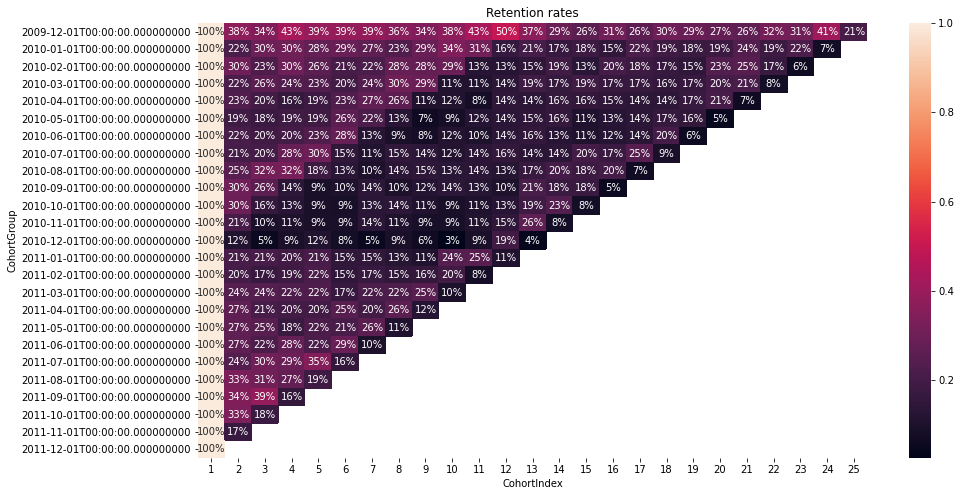

In [18]:
#build the heatmap 
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%')